<a href="https://colab.research.google.com/github/imenFerjani/Road-Anomalies-Detection/blob/main/Road_Anomalies_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title:  Road Anomalies source code
 Description: Extracting features (time domain, frequency domain and time-frequency domain) and fed them to three types of machine learning models: Neural Network, Support Vector Machine and Decision Tree)

** Author: Eman Ferjani**
 Date:   April, 1, 2021

In [ ]:
import pandas as pd
from sklearn.ensemble import *
from sklearn.tree import *
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.feature_selection import *
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.naive_bayes import *
from sklearn.svm import *
from sklearn.neighbors import *
from sklearn.tree import *
from sklearn.metrics import *
import time
import warnings
warnings.filterwarnings("ignore")
import pywt
from numpy.testing import assert_array_almost_equal


In [ ]:
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
from itertools import islice
from collections import deque
from pylab import *
from math import sqrt
import numpy as np
from tqdm import tqdm
import sys
import json
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz
import scipy, scipy.signal
import pywt
import pandas as pd
from scipy.signal import savgol_filter

In [ ]:
# Datasets are stored in MyDrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
w=30

In [ ]:
def window(a,copy = False):
    a=np.array(a)
    sh = (a.size - w + 1, w)
    st = a.strides * 2
    view = np.lib.stride_tricks.as_strided(a, strides = st, shape = sh)[0::w//2]
    view=[list(i) for i in view]
    if copy:
        return view.copy()
    else:
        return view

In [ ]:
time=['mean','IS','var','stdev','cv','med','rang','RMS','entropy']
frequency=['DC_Feature','Med_freq','max_freq','min_freq','mean_power','total_power','energy_feature']
wavelt=['Wave1','Wave2','Wave3','Wave4','Wave5','Wave6','Wave7','Wave8','Wave9','Wave10','Wave11',
               'Wave12','Wave13','Wave14','Wave15']
feature_names= time+wavelt +['Anomaly']

In [ ]:
from pandas.core.algorithms import *
from scipy.stats import *
def extract_features(sublist,t,f,wa):
  features11=[]
  if t:
    mean = sum(sublist) / len(sublist)
    sum1= sum([(float(j) - mean)**2 for j in sublist])
    sum2= sum([float(j)**2 for j in sublist])
    IS = sum2/len(sublist)      
    var = float(sum1) / (len(sublist) - 1) # Variance
    stdev = sqrt(var) # Standard deviation
    cv = stdev / mean # Coefficient of variation
    med = median(sublist) # median
    rang = max(sublist) - min(sublist) # range    
    RMS = math.sqrt(sum2/len(sublist)) # Root Mean Square
    pd_series = pd.Series(sublist)
    counts = pd_series.value_counts()
    ent = entropy(counts)
    features11.extend([mean,IS,var,stdev,cv,med,rang,RMS,ent])
  if f:
    DC_Feature = scipy.fft.dct(sublist)[0]
    sig_fft=list(scipy.fft.fft(sublist))
    Med_freq = 1/2*sum(sig_fft)
    max_freq = max(sig_fft)
    min_freq = min(sig_fft)
    mean_power = sum(sig_fft)/len(sig_fft)
    total_power = sum(sig_fft)
    energy_feature=sum(np.abs(sig_fft)**2)
    features11.extend([DC_Feature,Med_freq,max_freq,min_freq,mean_power,total_power,energy_feature])
  if wa:
    cA1,cD11 = pywt.wavedec(sublist, wavelet='db2', level=1)
    cA2, cD22, cD12 = pywt.wavedec(sublist, wavelet='db2', level=2)
    cA3, cD33, cD23, cD13 = pywt.wavedec(sublist, wavelet='db2', level=3)
    cA4, cD44,cD34,cD24, cD14 = pywt.wavedec(sublist, wavelet='db2', level=4)
    cA5, cD55,cD45,cD35,cD25, cD15 = pywt.wavedec(sublist, wavelet='db2', level=5)
		#arr, coeff_slices, coeff_shapes = pywt.ravel_coeffs(coeffs)
#print(arr)
    Wave1=np.sum(np.square(cD11))
    Wave2=np.sum(np.square(cD22))
    Wave3=np.sum(np.square(cD12))
    Wave4=np.sum(np.square(cD33))
    Wave5=np.sum(np.square(cD23))
    Wave6=np.sum(np.square(cD13))
    Wave7=np.sum(np.square(cD44))
    Wave8=np.sum(np.square(cD34))
    Wave9=np.sum(np.square(cD24))
    Wave10=np.sum(np.square(cD14))
    Wave11=np.sum(np.square(cD55))
    Wave12=np.sum(np.square(cD45))
    Wave13=np.sum(np.square(cD35))
    Wave14=np.sum(np.square(cD25))
    Wave15=np.sum(np.square(cD15))
    features11.extend([Wave1,Wave2,Wave3,Wave4,Wave5,Wave6,Wave7,Wave8,Wave9,Wave10,Wave11,Wave12,Wave13,Wave14,Wave15])
  return [float(i) for i in features11]

In [ ]:
def find_position(j,sublist,sliding_window_list):
  return len(sublist)*j+len(sublist)//2 - w//2 * j

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#def process_database1():
d=[]
for filename in os.listdir('./gdrive/MyDrive/Road_Anomalies_Datasets/Acceleromter_data1/data/Training/'):
  if filename.endswith(".json"): 
    filename = os.path.join('./gdrive/MyDrive/Road_Anomalies_Datasets/Acceleromter_data1/data/Training/', filename)
    with open(filename) as f:
      data = json.load(f)
      rot_acc_z = data['rot_acc_z']
      #rot_acc_x = data['rot_acc_x']
      #rot_acc_y = data['rot_acc_y']
      #rot_acc_z=rot_acc_z+rot_acc_y
      pos=0        
      sliding_window_list = window(rot_acc_z,copy = True)
      for j,sublist in enumerate(sliding_window_list):
        #mean = sum(sublist) / len(sublist) #Mean
        features=extract_features(sublist,t=True,f=False,wa=True)
        found=False
        pos=find_position(j,sublist,sliding_window_list)
        for a in data['anomalies']:
          if((a['start']+w//2) <= pos <= (a['end']-w//2)):
            found=True
            break
        if found:
          label=a['type']
        else:
          label='no anomaly'
        d.append([item for item in features]+[label])
for filename in os.listdir('./gdrive/MyDrive/Road_Anomalies_Datasets/Acceleromter_data1/data/Test/'):
  if filename.endswith(".json"): 
    filename = os.path.join('./gdrive/MyDrive/Road_Anomalies_Datasets/Acceleromter_data1/data/Test/', filename)
    with open(filename) as f:
      data = json.load(f)
      rot_acc_z = data['rot_acc_z']
      #rot_acc_x = data['rot_acc_x']
      #rot_acc_y = data['rot_acc_y']
      #rot_acc_z=rot_acc_z+rot_acc_y
      pos=0        
      sliding_window_list = window(rot_acc_z,copy = True)
      for j,sublist in enumerate(sliding_window_list):
        #mean = sum(sublist) / len(sublist) #Mean
        features=extract_features(sublist,t=True,f=False,wa=True)
        found=False
        pos=find_position(j,sublist,sliding_window_list)
        for a in data['anomalies']:
          if((a['start']+w//2) <= pos <= (a['end']-w//2)):
            found=True
            break
        if found:
          label=a['type']
        else:
          label='no anomaly'
        d.append([item for item in features]+[label])
#Create the pandas DataFrame'''
df1 = pd.DataFrame(d, columns = feature_names)
# converting type of columns to 'category'
df1['Anomaly'] = df1['Anomaly'].astype('category')
# Assigning numerical values and storing in another column
df1['Anomaly_cat'] = df1['Anomaly'].cat.codes
print(df1)
#df1['Anomaly'] = df1['Anomaly'].astype('category')
#obj_df.dtypes
    #print(df)
  # Import train_test_split function
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df1.iloc[:,[i for i in range(0,24)]],
                                                      df1['Anomaly_cat'], test_size=0.3,random_state=109) # 70% training and 30% test
clf = MLPClassifier(random_state=1, max_iter=300)

#clf = svm.SVC(C=1,kernel='rbf',gamma=0.002,tol=0.001)
#clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
  #print("test for w=",w)
print("*******************************************************************************************************************")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))
print("F1 score:",metrics.f1_score(y_test, y_pred,average='macro'))
print(metrics.classification_report(y_test, y_pred, target_names=['No anomaly', 'Pothole', 'Asphalt speed bump', 'Metal bumps'], sample_weight=None, digits=2, output_dict=False, zero_division='warn'))        

           mean         IS       var  ...    Wave15     Anomaly  Anomaly_cat
0      9.891933  97.900458  0.051841  ...  0.491935  no anomaly            3
1      9.897100  98.025671  0.075603  ...  0.299848  no anomaly            3
2      9.850000  97.114431  0.095101  ...  0.486788  no anomaly            3
3      9.808100  96.281178  0.085192  ...  0.303880  no anomaly            3
4      9.917967  98.448656  0.085442  ...  0.194855  no anomaly            3
...         ...        ...       ...  ...       ...         ...          ...
73212  9.665367  93.520644  0.104826  ...  0.725050  no anomaly            3
73213  9.704500  94.290195  0.116767  ...  0.542397  no anomaly            3
73214  9.700600  94.242968  0.146201  ...  0.813163  no anomaly            3
73215  9.653567  93.332582  0.146103  ...  1.278614  no anomaly            3
73216  9.745033  95.079755  0.118015  ...  0.685139  no anomaly            3

[73217 rows x 26 columns]
*************************************************

In [ ]:
import pandas as pd
import os
def get_data_from_csv(anomaly_name):
  for filename in os.listdir('./gdrive/MyDrive/Road_Anomalies_Datasets/Acceleromter_data2/data/'+anomaly_name+'/'):
    #print(filename)
    if filename.endswith(".csv"): 
      filename = os.path.join('./gdrive/MyDrive/Road_Anomalies_Datasets/Acceleromter_data2/data/'+anomaly_name+'/', filename)
      data = pd.read_csv(filename, header=0)
      rot_acc_z = list(data.acc_z)       
      sliding_window_list = window(rot_acc_z,copy = True)
      for j,sublist in enumerate(sliding_window_list):
        #mean = sum(sublist) / len(sublist) #Mean
        features=extract_features(sublist,t=True,f=False,wa=True)
        label=anomaly_name
        d.append([item for item in features]+[label])


In [ ]:
#def build_database2():
d=[]
get_data_from_csv('asphalt_bumps')
get_data_from_csv('metal_bumps')
get_data_from_csv('potholes')
get_data_from_csv('regular_road')
get_data_from_csv('worn_out_road')
df3 = pd.DataFrame(d, columns=feature_names)
X_train, X_test, y_train, y_test = train_test_split(df3.iloc[:,[i for i in range(0,24)]],
                                                      df3['Anomaly'], test_size=0.3,random_state=109) # 70% training and 30% test
clf = MLPClassifier(random_state=1, max_iter=300)
#clf = svm.SVC(C=1,kernel='rbf',gamma=0.002,tol=0.001)
#clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("test for w=",w)
print("*******************************************************************************************************************")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))
print("F1 score:",metrics.f1_score(y_test, y_pred,average='macro'))
#print(metrics.classification_report(y_test, y_pred, target_names=['asphalt_bumps', 'metal_bumps', 'potholes', 'regular_road', 'worn_out_road'],
#sample_weight=None, digits=2, output_dict=False, zero_division='warn')) 


test for w= 30
*******************************************************************************************************************
Accuracy: 0.5253164556962026
Precision: 0.5437720702676119
Recall: 0.44720059030243986
F1 score: 0.4493860336913863


In [ ]:
d=[]


In [ ]:
CM=metrics.confusion_matrix(y_test, y_pred, labels=None)

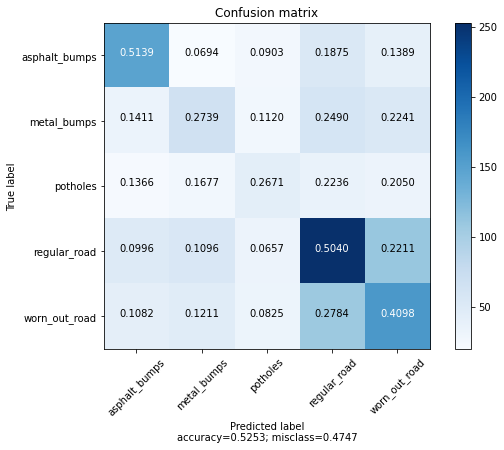

In [ ]:
plot_confusion_matrix(CM,target_names=['asphalt_bumps', 'metal_bumps', 'potholes', 'regular_road', 'worn_out_road'],title='Confusion matrix',cmap=None,normalize=True)

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df1.iloc[:,[i for i in range(1,31)]], df1['Anomaly'], test_size=0.3,random_state=109) # 70% training and 30% test

In [ ]:
df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [ ]:
#Import svm model
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix


#Create a svm Classifier
#clf = svm.SVC(kernel='linear') # Linear Kernel
#clf = svm.SVC(C=1,kernel='rbf',gamma=0.002,tol=0.001)
clf = DecisionTreeClassifier(random_state=0)
#clf = MLPClassifier(random_state=1, max_iter=300)
#Train the model using the training sets
#X_train.astype(np.float64)
#X_train.applymap(np.absolute)
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))
print("F1 score:",metrics.f1_score(y_test, y_pred,average='macro'))
print(metrics.classification_report(y_test, y_pred, target_names=['no anomaly', 'Bache', 'Bordo', 'Boyas'], sample_weight=None, digits=2, output_dict=False, zero_division='warn'))

Accuracy: 0.9470802919708029
Precision: 0.4106629720853859
Recall: 0.4266399683861516
F1 score: 0.4178110377356807
              precision    recall  f1-score   support

  no anomaly       0.11      0.11      0.11         9
       Bache       0.43      0.45      0.44        33
       Bordo       0.12      0.17      0.14         6
       Boyas       0.98      0.97      0.98      1048

    accuracy                           0.95      1096
   macro avg       0.41      0.43      0.42      1096
weighted avg       0.95      0.95      0.95      1096



In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(0.5253, 0.4747))
    plt.show()

In [ ]:
#Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
#Now the normalize the diagonal entries
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#The diagonal entries are the accuracies of each class
cm.diagonal()

array([0.06097561, 0.30430328, 0.04025424, 0.99304482])

In [4]:
!git init
!git add README.md
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/imenFerjani/Road-Anomalies-Detection.git
!git push -u origin main

Initialized empty Git repository in /content/.git/
fatal: pathspec 'README.md' did not match any files

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@2083d6693b2d.(none)')
error: refname refs/heads/master not found
fatal: Branch rename failed
error: src refspec main does not match any.
error: failed to push some refs to 'https://github.com/imenFerjani/Road-Anomalies-Detection.git'
